In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("confirmatory_packages.csv")[1 : -1]
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15240\1313009511.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("confirmatory_packages.csv")[1 : -1]


,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
1,12,2014-11-20 15:00:01.032,2016-04-02 16:25:54.128,546e01d626714c6c4400004e,Things that matter. Pass 'em on.,People Sent This Lesbian Questions And Her Rai...,<p>I'll be honest. I've wondered about 7.</p>,people-sent-this-lesbian-questions-and-her-rai...,546d1b4bfd3617f091000041,4587,130,55.8,False,False,NaN,NaN,201446
2,13,2014-11-20 11:33:51.973,2016-04-02 16:25:54.069,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,$3 Million Is What It Takes For A State To Leg...,<p>Iff you start with the basic fact that inno...,3-million-is-what-it-takes-for-a-state-to-lega...,546dce659ad54ec65b000041,3017,19,26.9,False,False,NaN,NaN,201446
3,14,2014-11-20 11:34:12.107,2016-04-02 16:25:54.049,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,The Fact That Sometimes Innocent People Are Ex...,<p>Iff you start with the basic fact that inno...,the-fact-that-sometimes-innocent-people-are-ex...,546dce659ad54ec65b000041,2974,26,100.0,True,False,NaN,NaN,201446
4,15,2014-11-20 11:34:33.935,2016-04-02 16:25:54.072,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,Reason #351 To End The Death Penalty: It Costs...,<p>Iff you start with the basic fact that inno...,reason-351-to-end-the-death-penalty-it-costs-3...,546dce659ad54ec65b000041,3050,10,0.2,False,False,NaN,NaN,201446
5,16,2014-11-20 11:34:48.474,2016-04-02 16:25:54.052,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,"I Was Already Against The Death Penalty, But N...",<p>Iff you start with the basic fact that inno...,i-was-already-against-the-death-penalty-but-no...,546dce659ad54ec65b000041,3061,20,32.0,False,False,NaN,NaN,201446


In [3]:
df.columns

Index(['Unnamed: 0', 'created_at', 'updated_at', 'clickability_test_id',
       'excerpt', 'headline', 'lede', 'slug', 'eyecatcher_id', 'impressions',
       'clicks', 'significance', 'first_place', 'winner', 'share_text',
       'square', 'test_week'],
      dtype='object')

df.isna().sum()

In [4]:
df.head()

,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
1,12,2014-11-20 15:00:01.032,2016-04-02 16:25:54.128,546e01d626714c6c4400004e,Things that matter. Pass 'em on.,People Sent This Lesbian Questions And Her Rai...,<p>I'll be honest. I've wondered about 7.</p>,people-sent-this-lesbian-questions-and-her-rai...,546d1b4bfd3617f091000041,4587,130,55.8,False,False,NaN,NaN,201446
2,13,2014-11-20 11:33:51.973,2016-04-02 16:25:54.069,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,$3 Million Is What It Takes For A State To Leg...,<p>Iff you start with the basic fact that inno...,3-million-is-what-it-takes-for-a-state-to-lega...,546dce659ad54ec65b000041,3017,19,26.9,False,False,NaN,NaN,201446
3,14,2014-11-20 11:34:12.107,2016-04-02 16:25:54.049,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,The Fact That Sometimes Innocent People Are Ex...,<p>Iff you start with the basic fact that inno...,the-fact-that-sometimes-innocent-people-are-ex...,546dce659ad54ec65b000041,2974,26,100.0,True,False,NaN,NaN,201446
4,15,2014-11-20 11:34:33.935,2016-04-02 16:25:54.072,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,Reason #351 To End The Death Penalty: It Costs...,<p>Iff you start with the basic fact that inno...,reason-351-to-end-the-death-penalty-it-costs-3...,546dce659ad54ec65b000041,3050,10,0.2,False,False,NaN,NaN,201446
5,16,2014-11-20 11:34:48.474,2016-04-02 16:25:54.052,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,"I Was Already Against The Death Penalty, But N...",<p>Iff you start with the basic fact that inno...,i-was-already-against-the-death-penalty-but-no...,546dce659ad54ec65b000041,3061,20,32.0,False,False,NaN,NaN,201446


In [5]:
df = df[['clickability_test_id','headline','eyecatcher_id', 'impressions',
       'clicks']]

In [6]:
df.describe()

,impressions,clicks
count,105549.000000,105549.000000
mean,3567.246056,54.397285
std,1436.024724,45.120355
min,1.000000,0.000000
25%,2748.000000,25.000000
50%,3116.000000,42.000000
75%,4083.000000,70.000000
max,36908.000000,822.000000


# 1. About the Dataset Itself

    How is this dataset structured (tests, variants, impressions, clicks)?
    
    Are there missing values or data quality issues ?
    
    Are there tests with very low impressions that I should filter out?

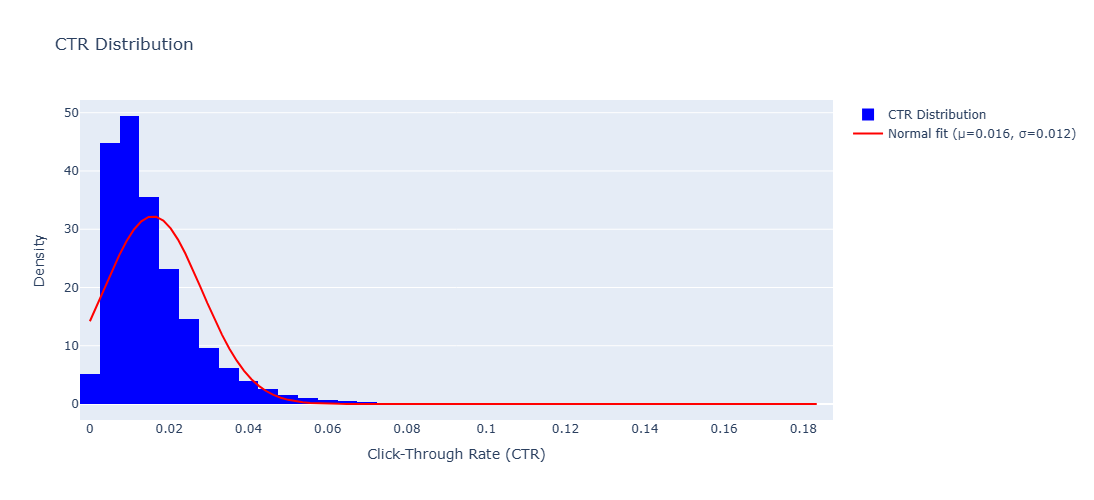

In [7]:
df["ctr"] = df["clicks"] / df["impressions"]

mu, sigma = stats.norm.fit(df["ctr"])
x_norm = np.linspace(df["ctr"].min(), df["ctr"].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Histogram
hist_data = go.Histogram(
    x = df["ctr"], nbinsx = 50, histnorm="probability density",
    marker=dict(color="blue"), name="CTR Distribution"
)

# Overlay Normal
norm_data = go.Scatter(
    x = x_norm, y = y_norm, mode="lines",
    name=f"Normal fit (μ={mu:.3f}, σ={sigma:.3f})", line=dict(color="red")
)

fig = go.Figure([hist_data, norm_data])
fig.update_layout(
    title="CTR Distribution",
    xaxis_title="Click-Through Rate (CTR)",
    yaxis_title="Density",
    height = 500
)
fig.show()


This plot Shows that most headlines perform under 5% CTR.

Confirms that CTR distribution is not normal → so shouldn’t rely on parametric normality-based tests blindly (t-tests, z-tests).

Strengthens the case for using proportion tests (two-sample proportion test, chi-square, logistic regression).

In [8]:
df["clickability_test_id"].nunique()

22743

In [9]:
variants_count = df.groupby("clickability_test_id")["headline"].count()

test_id = variants_count[variants_count == 2].index[0]

df_test = df[df["clickability_test_id"] == test_id]
df_test

,clickability_test_id,headline,eyecatcher_id,impressions,clicks,ctr
27172,5143606a220cb800020005c5,Why It's Great To Grow Up In Scandinavia,5332ba141fae79f09f002c51,5489,60,0.010931
28046,5143606a220cb800020005c5,Why It's Great To Grow Up In Countries With Re...,5332ba141fae79f09f002c51,5441,48,0.008822


In [10]:
df_test["ctr"] = df_test["clicks"]/df_test["impressions"]
df_test

C:\Users\Asus\AppData\Local\Temp\ipykernel_15240\1924593577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clickability_test_id,headline,eyecatcher_id,impressions,clicks,ctr
27172,5143606a220cb800020005c5,Why It's Great To Grow Up In Scandinavia,5332ba141fae79f09f002c51,5489,60,0.010931
28046,5143606a220cb800020005c5,Why It's Great To Grow Up In Countries With Re...,5332ba141fae79f09f002c51,5441,48,0.008822


In [11]:
from statsmodels.stats.proportion import proportions_ztest

# Successes (clicks) for both variants
successes = df_test["clicks"].values  

# Trials (impressions) for both variants
trials = df_test["impressions"].values  

# Run two-sided z-test
z_stat, p_val = proportions_ztest(successes, trials, alternative="two-sided")

print(f"Z-statistic: {z_stat:.3f}, p-value: {p_val:.4f}")


Z-statistic: 1.115, p-value: 0.2650


In [12]:
if p_val < 0.05:
    print(f"We reject the null hypothesis (significant difference). p_val: {p_val:.4f}")
else:
    print(f"There is not enough evidence to reject the null hypothesis. p_val: {p_val:.4f}")

There is not enough evidence to reject the null hypothesis. p_val: 0.2650


In [13]:
from statsmodels.stats.proportion import proportions_ztest

results = []

# Loop through each test with 2 variants
for test_id, group in df.groupby("clickability_test_id"):
    if len(group) == 2:  # only take A/B tests
        clicks = group["clicks"].values
        impressions = group["impressions"].values
        
        # Run the z-test
        z_stat, p_val = proportions_ztest(clicks, impressions, alternative="two-sided")
        
        # Compute CTRs
        ctrs = clicks / impressions
        ctr_diff = abs(ctrs[0] - ctrs[1])
        
        results.append({
            "test_id": test_id,
            "variant_1_ctr": ctrs[0],
            "variant_2_ctr": ctrs[1],
            "ctr_diff": ctr_diff,
            "z_stat": z_stat,
            "p_val": p_val,
            "significant": p_val < 0.05
        })

import pandas as pd
results_df = pd.DataFrame(results)


C:\Users\Asus\.conda\envs\p11venv\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning:

invalid value encountered in scalar divide



In [14]:
# % of significant results
sig_rate = results_df["significant"].mean() * 100

# Average CTR difference (only for significant ones)
avg_ctr_lift = results_df.loc[results_df["significant"], "ctr_diff"].mean()

print(f"Out of {len(results_df)} A/B tests:")
print(f"- {sig_rate:.2f}% showed statistically significant differences")
print(f"- Average CTR lift (when significant): {avg_ctr_lift:.4f}")


Out of 601 A/B tests:
- 19.13% showed statistically significant differences
- Average CTR lift (when significant): 0.0085


# Analyzed 600+ newsroom headline A/B tests. Found that ~19% produced statistically significant results, with an average CTR lift of ~0.85%. Most tests did not yield conclusive differences, aligning with the real-world expectation that only a minority of A/B tests succeed. Demonstrated ability to run hypothesis testing at scale and quantify business impact.

In [15]:
from scipy.stats import chi2_contingency

multi_results = []

for test_id, group in df.groupby("clickability_test_id"):
    if len(group) > 2:  # only multi-variant tests (A/B/C+)
        contingency = []
        
        for _, row in group.iterrows():
            if row["impressions"] > 0:
                clicks = row["clicks"]
                non_clicks = row["impressions"] - row["clicks"]
                
                # Skip degenerate cases (all clicks OR no clicks)
                if clicks == 0 or non_clicks == 0:
                    continue
                    
                contingency.append([clicks, non_clicks])
        
        # Only run chi-square if we still have 2+ valid variants
        if len(contingency) >= 2:
            chi2, p_val, dof, expected = chi2_contingency(contingency)
            
            ctrs = group["clicks"] / group["impressions"].replace(0, np.nan)
            ctr_range = ctrs.max() - ctrs.min()
            
            multi_results.append({
                "test_id": test_id,
                "num_variants": len(group),
                "chi2": chi2,
                "p_val": p_val,
                "ctr_range": ctr_range,
                "significant": p_val < 0.05
            })

multi_df = pd.DataFrame(multi_results)


In [16]:
sig_rate = multi_df["significant"].mean() * 100
avg_ctr_range = multi_df.loc[multi_df["significant"], "ctr_range"].mean()

print(f"Out of {len(multi_df)} multi-variant tests:")
print(f"- {sig_rate:.2f}% showed statistically significant differences")
print(f"- Average CTR gap between best and worst variant (when significant): {avg_ctr_range:.4f}")


Out of 22133 multi-variant tests:
- 46.12% showed statistically significant differences
- Average CTR gap between best and worst variant (when significant): 0.0120


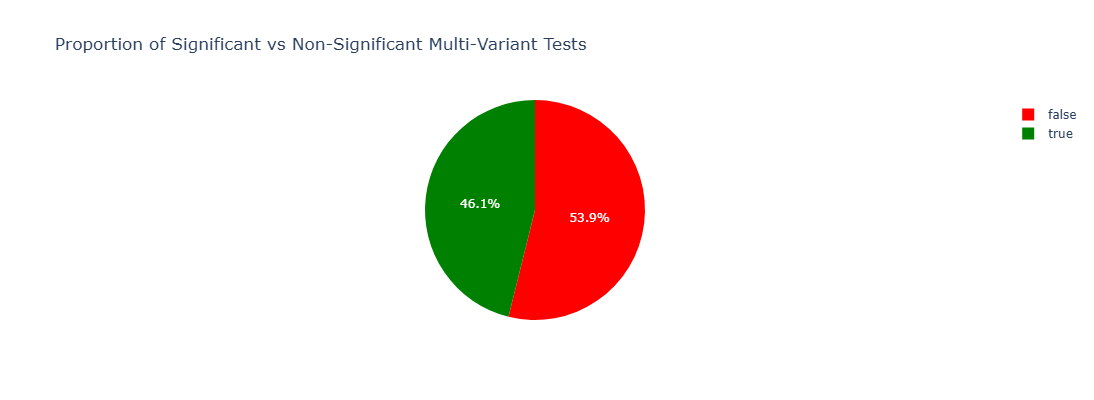

In [17]:
import plotly.express as px

sig_counts = multi_df["significant"].value_counts().reset_index()
sig_counts.columns = ["Significant", "Count"]

fig1 = px.pie(
    sig_counts,
    names="Significant",
    values="Count",
    title="Proportion of Significant vs Non-Significant Multi-Variant Tests",
    color="Significant",
    color_discrete_map={True: "green", False: "red"}
)
fig1.update_layout(
    width = 800,
    height = 400
)
fig1.show()


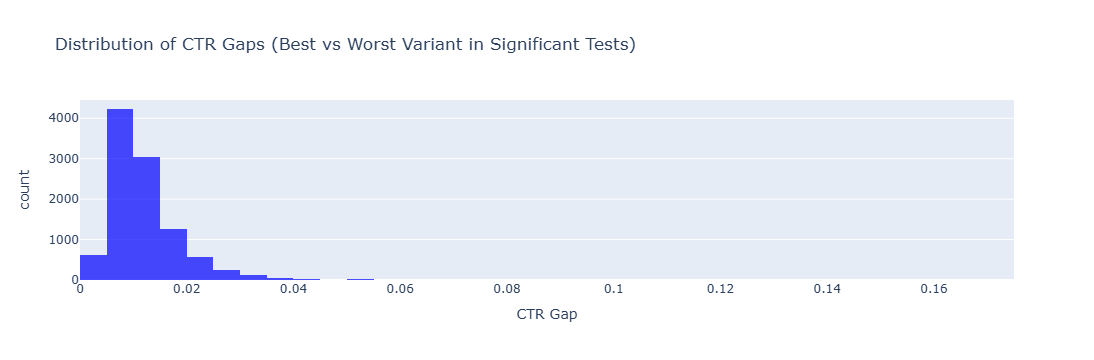

In [18]:
fig2 = px.histogram(
    multi_df[multi_df["significant"] == True],
    x="ctr_range",
    nbins=50,
    title="Distribution of CTR Gaps (Best vs Worst Variant in Significant Tests)",
    labels={"ctr_range": "CTR Gap"},
    opacity=0.7
)
fig2.update_traces(marker_color="blue")
fig2.show()


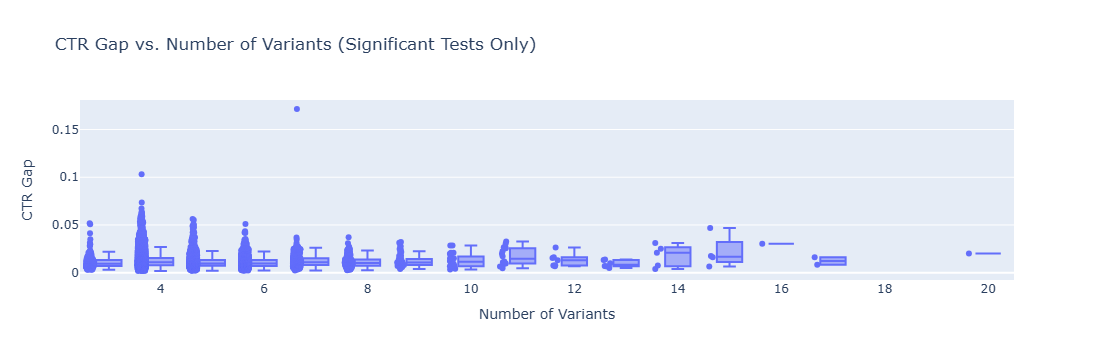

In [19]:
fig3 = px.box(
    multi_df[multi_df["significant"] == True],
    x="num_variants",
    y="ctr_range",
    points="all",
    title="CTR Gap vs. Number of Variants (Significant Tests Only)",
    labels={"num_variants": "Number of Variants", "ctr_range": "CTR Gap"}
)
fig3.show()
